In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import lightkurve as lk
from astropy.io import ascii
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

TessTargetPixelFile(TICID: 153123772)


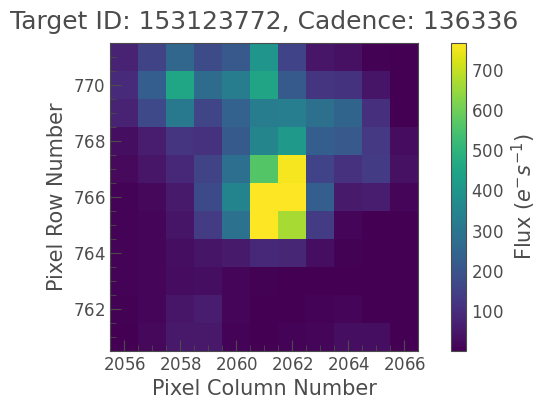

In [8]:
tpf = lk.search_targetpixelfile('TIC 153123772', mission="TESS").download_all() ##quality_bitmask=195, flux_column='sap_flux')
print(tpf[1])
x, y = 2061.0, 766.0
xsize, ysize = 11.0, 11.0
pixels = 21.0 ## arcsec
ras, decs = 89.2834570110974, -24.86211939594563
rat, dect = tpf[1].ra,  tpf[1].dec

#df = pd.read_csv('GaiaTIC1.csv')
#print(df)
#tpf[1].get_header()
#tpf[1].show_properties()

tpf[1].plot()
plt.show()

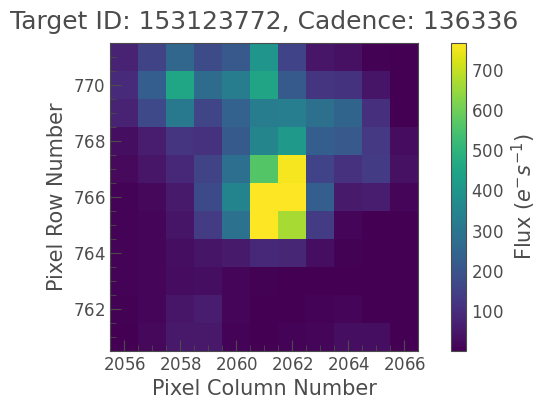

In [10]:
tpf = lk.search_targetpixelfile('TIC 153123772', mission="TESS").download_all(quality_bitmask=195, flux_column='sap_flux')
plt.show(tpf[1].plot())

#search_result = lk.search_tesscut('TIC 153123772', sector=32)
#lk.log.setLevel('INFO')

In [11]:
tpf[1].get_header(ext=0).get('SECTOR')
#tpf[1].show_properties()
#tpf[1].wcs.pixel_to_world(0, 0)
#tpf[1].time
#tpf[1].flux.shape
#tpf[1].flux[0].value
#tpf[1].flux_bkg

32

<Figure size 640x480 with 0 Axes>

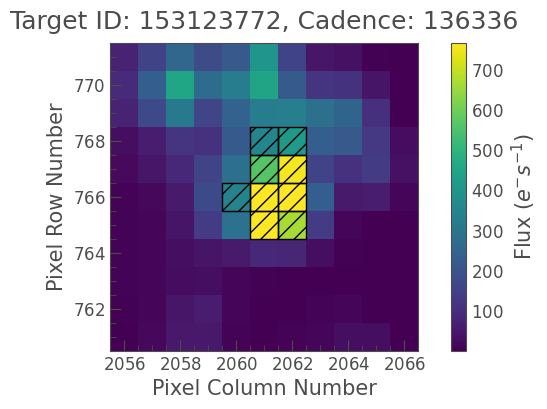

In [12]:
ns=1 ## sector 32
target_mask = tpf[ns].create_threshold_mask(threshold=4.5, reference_pixel='center')
plt.cla()
plt.clf()
plt.show(tpf[ns].plot(aperture_mask=target_mask, mask_color='k'))

9


<Figure size 640x480 with 0 Axes>

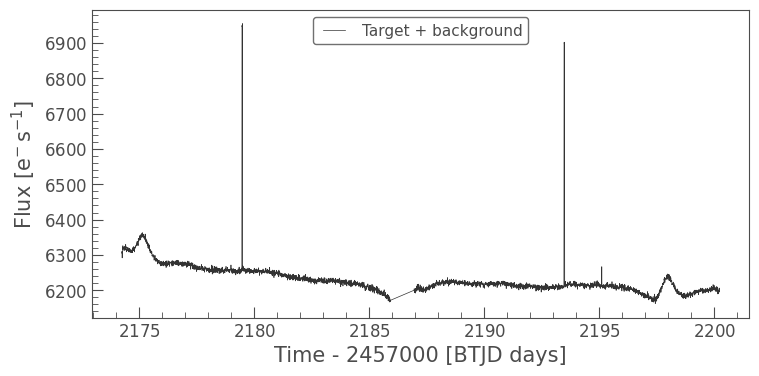

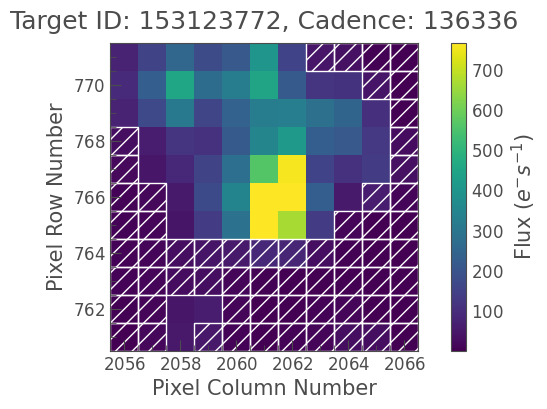

61


In [13]:

n_target_pixels = target_mask.sum()
print(n_target_pixels)
target_lc = tpf[ns].to_lightcurve(aperture_mask=target_mask,) ## convert to light curve
plt.cla()
plt.clf()
plt.show(target_lc.plot(label='Target + background')) # plot its light curve

background_mask = ~tpf[ns].create_threshold_mask(threshold=0.005, reference_pixel=None)# estimating background
plt.show(tpf[ns].plot(aperture_mask=background_mask, mask_color='w') )
n_background_pixels = background_mask.sum()
print(n_background_pixels)

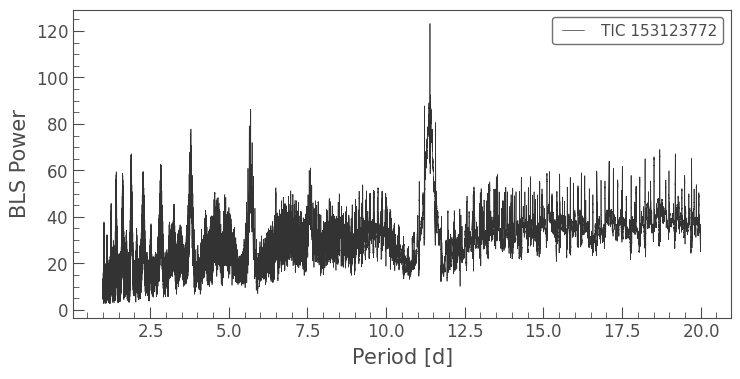

11.394644394644395 d


In [14]:
#tcc = tpf.to_lightcurve()##aperture_mask=target_mask,) ## convert to light curve

#lk.search_targetpixelfile('TIC 153123772',mission="TESS").download_all(quality_bitmask=195, flux_column='sap_flux')
period = np.linspace(1, 20, 1000000)
#lcc = lk.search_lightcurve('TIC 153123772', mission="TESS").download_all().stitch()
#pg = lcc[1:].to_periodogram(oversample_factor=1, maximum_period=100)
#pg = lcc.to_periodogram(maximum_period=100)

lc1 = lk.search_lightcurve('TIC 153123772', mission='Tess', author="TESS-SPOC").download_all(flux_column='pdcsap_flux')
lc = lc1.stitch() #.flatten(window_length=401)
lc.flux = -lc.flux
pg = lc.to_periodogram(method='bls', period=period, frequency_factor=500, objective='snr');
plt.show(pg.plot());
print(pg.period_at_max_power)

<Figure size 640x480 with 0 Axes>

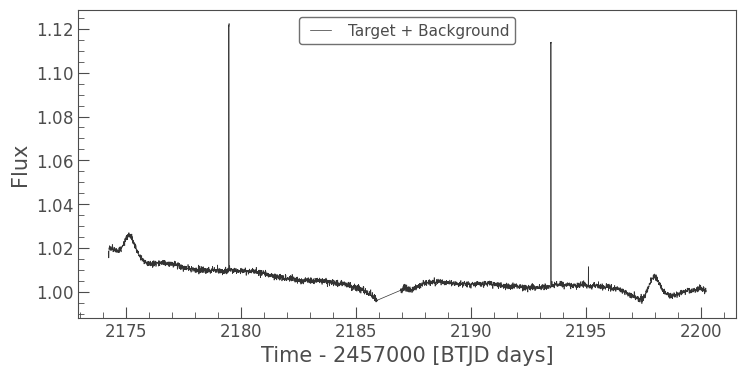

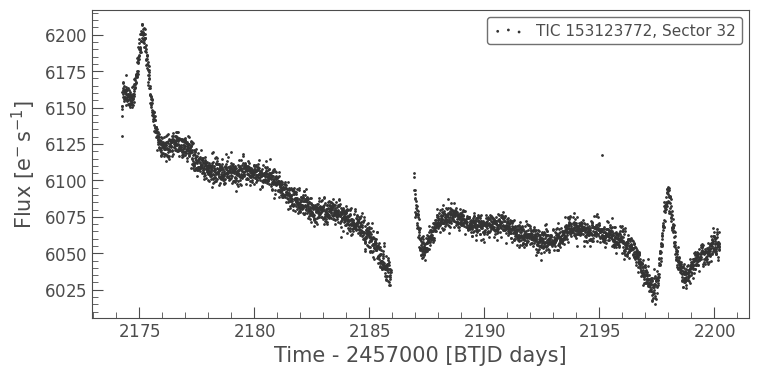

In [16]:
background_lc_per_pixel = tpf[ns].to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
plt.cla()
plt.clf()
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', markersize=4.0)

#(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
#                                                        ylabel='Normalized, shifted flux');

corrected_lc = target_lc - background_estimate_lc.flux
plt.show(corrected_lc.scatter(label='TIC 153123772, Sector 32'))
background_estimate_lc.flux

ascii.write(corrected_lc['time', 'flux', 'flux_err'][:], 'Sector32SAPdata.dat', overwrite=True, format='no_header')

3595


<Figure size 640x480 with 0 Axes>

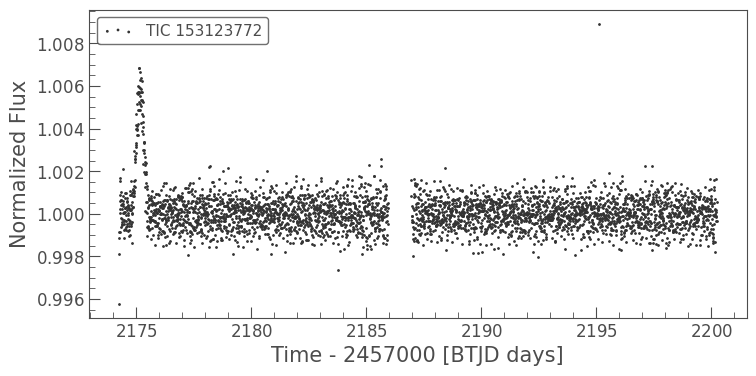

1.0089282501960655 736


"\nfor jj in range(50):  \n    ax = corrected_lc[:].flatten(jj*15+1).scatter()##.scatter()\n#ax = corrected_lc.flatten(4001).fold(period_days, epoch_time).scatter()\n    plt.show()\n    clc= corrected_lc[:].flatten(jj*15+1)##.fold(period_days, epoch_time=epoch_time)\n    ascii.write(clc['time',     'flux',     'flux_err'][:], 'Sector32data.dat', overwrite=True, format='no_header')  \n    print(clc['flux'].max() ,   jj*15+1)\n"

In [18]:
period_days = 11.393423143561519
epoch_time = 2175.26398602531#2209.361653386310
epoch_time = 2209.361653386310
#corrected_lc=gaussian_filter(corrected_lc, 1.4)
print(len(corrected_lc))
#for i in range(len(corrected_lc) ):
#    print (corrected_lc['time'][i],  i )
plt.cla()
plt.clf()

ax = corrected_lc.flatten(59).scatter() ##.scatter()
#ax = corrected_lc.flatten(4001).fold(period_days, epoch_time).scatter()
plt.show()
clc = corrected_lc.flatten(59) ##.fold(period_days, epoch_time=epoch_time)
ascii.write(clc['time', 'flux', 'flux_err'][:], 'Sector32data.dat', overwrite=True, format='no_header')
print(clc['flux'].max() ,   49*15+1)

'''
for jj in range(50):
    ax = corrected_lc[:].flatten(jj*15+1).scatter()##.scatter()
#ax = corrected_lc.flatten(4001).fold(period_days, epoch_time).scatter()
    plt.show()
    clc= corrected_lc[:].flatten(jj*15+1)##.fold(period_days, epoch_time=epoch_time)
    ascii.write(clc['time',     'flux',     'flux_err'][:], 'Sector32data.dat', overwrite=True, format='no_header')
    print(clc['flux'].max() ,   jj*15+1)
'''

In [26]:
fds = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/Sector6SAPdata.dat", unpack=True)

In [29]:
fds.shape[-1]

981

-11.374978454668053
Lightcurve_ini is plotted!!!!


<Figure size 640x480 with 0 Axes>

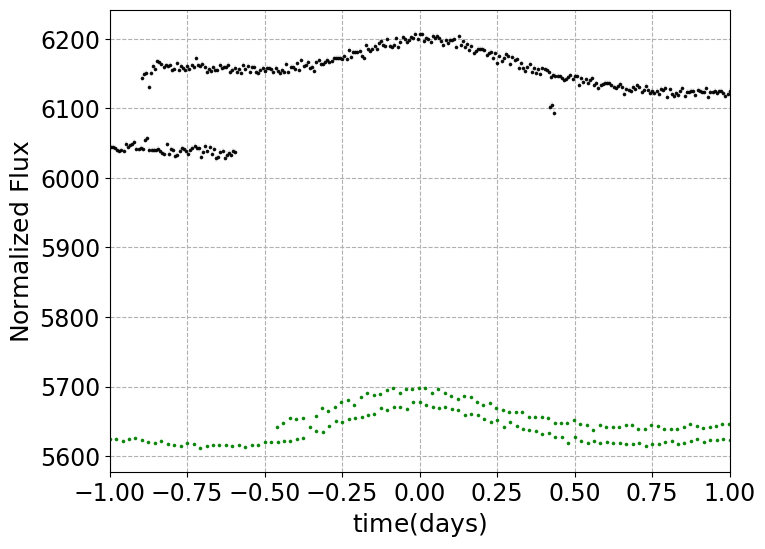

In [33]:
fds = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/Sector6SAPdata.dat", unpack=True)
n0 = fds.shape[-1]

fdd = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/Sector32SAPdata.dat", unpack=True)
n1 = fdd.shape[-1]

fds = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/Sector33SAPdata.dat", unpack=True)
n2 = fds.shape[-1]

t0 = 1480.1397390288491
P = 11.393423143561519

print(1468.764760574181 - 1480.1397390288491)

data = np.zeros((n0+n1, 4))
data[:n0,:3] = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/Sector6SAPdata.dat")
data[n0:,:3] = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/Sector32SAPdata.dat")
#data[(n1+n0):,:]=np.loadtxt("./Sector33data.dat")
n1 = 1687
n2 = 0
nt = n0 + n1 + n2

for i in range(n0 + n1 + n2):
    tim = (data[i,0] - t0)
    while(tim > P/2.0):
        tim = tim-P
    while(tim < -P/2.0):
        tim = tim + P
    data[i,0] = tim
    data[i,2] = abs(data[i,2])
    if(i < n0):                data[i,3] = 0
    if(i > n0 and i<(n1+n0)):  data[i,3] = 1
    if(i > (n0+n1)):           data[i,3] = 2


#Nd = int(7070)
#par = np.zeros((Nd, 3))
#par = np.loadtxt("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/SAP_data_Fold.txt") ##SAP_data_Fold.txt")

plt.cla()
plt.clf()
plt.figure(figsize=(8, 6))

plt.errorbar(data[:n0,0], data[:n0,1], yerr=data[:n0,2], fmt=".", markersize=3.2, color='g', ecolor='g', elinewidth=0.1, capsize=0, alpha=0.9)
plt.errorbar(data[n0:(n0+n1),0], data[n0:(n0+n1),1], yerr=data[n0:(n0+n1),2], fmt=".", markersize=3.2, color='k', ecolor='k', elinewidth=0.1, capsize=0, alpha=0.9)
#plt.errorbar(data[(n0+n1):,0], data[(n0+n1):,1], yerr=data[(n0+n1):,2],fmt=".",markersize=1.2,color='k',ecolor='#C1FFC1',elinewidth=0.01,capsize=0,alpha=0.9)
#plt.errorbar(data[:nt,0], data[:nt,1], yerr=data[:nt,2],fmt=".",markersize=1.2,color='g',ecolor='#C1FFC1',elinewidth=0.1,capsize=0,alpha=0.9)

#plt.errorbar(par[:,0],par[:,1], yerr=par[:,2],fmt=".",markersize=1.2,color='k',ecolor='#C1FFC1',elinewidth=0.01,capsize=0,alpha=0.9)

plt.ylabel(r"$\rm{Normalized}~\rm{Flux}$", fontsize=18)
plt.xlabel(r"$\rm{time}(days)$", fontsize=18)
plt.xlim(-1.0, 1.0)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17, rotation=0)
plt.grid("True")
plt.grid(linestyle='dashed')
fig3 = plt.gcf()
fig3.savefig("lightcurve_ini.jpg", dpi=200)
print("Lightcurve_ini is plotted!!!!")
plt.show()


# fil = open("https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/LastData.dat","w")
# fil.close()

#nm = np.argsort(data[:nt,0])
#for i in range(nt):
#    filename = "https://raw.githubusercontent.com/iamalisalehi/Self_Lensing/refs/heads/main/LastData.dat"
#    np.savetxt(filename, data[int(nm[i]),:].reshape((-1, 4)), fmt ="%.10f     %.10f       %.10f    %d ")